<a href="https://colab.research.google.com/github/ShivM99/Python-ML/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping**

*Importing libraries for web scraping*

In [ ]:
import openpyxl as xl
import requests as req
from bs4 import BeautifulSoup as bs #Importing 'beautifulsoup4' library

*Reading data from Excel file*

In [ ]:
file = xl.load_workbook ('Input.xlsx')
data = file ['Sheet1']
print (data.max_row) #Print max. no. of rows in the sheet

101


*Scraping data from the URLs provided in the Excel file*

In [ ]:
ids = []
for row in range (2, data.max_row + 1): #Iterate from row number 2 to max_row+1, i.e., all the rows except the header
  id = data ['A' + str(row)].value #Iterate over all the cells in 'A' column & store the value
  url = data ['B' + str(row)].value #Iterate over all the cells in 'B' column & store the value
  if (id != 'blackassign0036' and id != 'blackassign0049'): #blackassign0036 & blackassign0049 pages are throwing error
    ids.append (id) #Appending 'IDs' to to the list for later iterating through the file names
    r = req.get (url) #Accessing the URL
    soup = bs (r.content, 'html.parser') #Parsing the contents of source code using html.parser
    title = soup.title.string #Extracting the string within the <title> tag
    try:
      div = soup.find ('div', class_= 'td-post-content tagdiv-type')
      content = div.find_all (['p', 'ol', 'ul', 'h2']) #Searching for all the given tags in the specified div
      with open (id, 'w') as f:
        f.write (title + "\n")
        for text in content:
          f.write (text.get_text())
    except:
      print (id)
      div = soup.select_one ('.tdb_single_content .tdb-block-inner.td-fix-index')
      #div = soup.select_one ('.tdb_single_content .tdb-block-inner')
      content = div.find_all (['p', 'ol', 'ul', 'h2', 'h3', 'h4', 'h5'])
      with open (id, 'w') as f:
        f.write (title + "\n")
        for text in content:
          f.write (text.get_text())

blackassign0014
blackassign0020
blackassign0029
blackassign0043
blackassign0083
blackassign0084
blackassign0092
blackassign0099
blackassign0100


# **Data Preprocessing**

*Importing all the libraries necessary for performing NLP data pre-processing*

In [ ]:
#For removing anything except letters & spaces
import re
import nltk
#For tokenization
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
#For removing stop words
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
              'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
              'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
              'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
              'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
              'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
              'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
              'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
              'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there',
              'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
              'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
              'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
#For tagging words with part-of-speech & lemmatizing them
nltk.download ('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer() #Creating an object for 'WordNetLemmatizer' class

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*Function for returning the part-of-speech tag, necessary for proper lemmatization*

In [ ]:
def penn_wordnet (penntag):
  #Converting the universal Penn pos_tags into WordNet tags
  if penntag == 'VERB':
    return 'v'
  elif penntag == 'ADJ':
    return 'a'
  elif penntag == 'ADV':
    return 'r'
  else:
    return 'n'
'''
NOUN (nouns), VERB (verbs), ADJ (adjectives), ADV (adverbs),
PRON (pronouns), DET (determiners and articles),
ADP (prepositions and postpositions), NUM (numerals), CONJ (conjunctions),
PRT (particles), ‘.’ (punctuation marks) and
X (a catch-all for other categories such as abbreviations or foreign words)
'''

'\nNOUN (nouns), VERB (verbs), ADJ (adjectives), ADV (adverbs),\nPRON (pronouns), DET (determiners and articles),\nADP (prepositions and postpositions), NUM (numerals), CONJ (conjunctions),\nPRT (particles), ‘.’ (punctuation marks) and\nX (a catch-all for other categories such as abbreviations or foreign words)\n'

*Function for performing pre-processsing*

In [ ]:
def preprocessing (text):
  #Removing everything except 'a-z' & ' ' (digits, punctuations, \n, \t)
  text = re.sub (r'[^a-zA-Z ]', '', text)
  text = text.strip()
  #Tokenization
  tokens = word_tokenize (text)
  #Removing stop words (words that are used many times in the text but do not add much essence to the text)
  tokens_stop = [word for word in tokens if word not in stop_words]
  #Attaching part-of-speech tags to the tokens and lemmatizing them, along with converting them into lowercase
  tag_tokens = [lemma.lemmatize(word.lower(), pos=penn_wordnet(tag)) for word, tag in pos_tag(tokens_stop, tagset="Universal")]
  #Converting tokens back into a String
  preprocessed_text = ' '.join (tag_tokens)
  return ((tag_tokens, preprocessed_text))

*Preprocessing of the article texts*

In [ ]:
corpus_words = []
corpus_sent = []
for file in ids:
  #Opening file with 'f' handle
  f = open (file, 'r')
  #Read text into a single string
  text = f.read ()
  #Pre-processing (Removing digits & punctuations, tokenization, stop words removal, lemmatization)
  corpus_words.append (preprocessing(text)[0])
  corpus_sent.append (preprocessing(text)[1])
print (len(corpus_words))
print (corpus_sent)

98
['rising it city impact economy environment infrastructure city life year blackcoffer insightswe seen huge development dependence people technology recent year we also seen development ai chatgpt recent year so normal thing become fully dependent technology information technology major power developing nation a member developing nation india rapidly growing it base it also grown it city major control centre information technology rising it citiesnoida noida uttar pradesh near new delhi emerging it sector many large company like google microsoft ibm infosys others set company noida market base billion dollar great job boosting national economy the establishment many software company made noida information technology hubgurgaon gurgaon haryana also emerging it hub many large company like google microsoft ibm infosys others set company gurgaon market base billion dollar great job boosting national economybengaluru bengaluru called it hub india it also smart city many large company like

# **1st model building using VADER**

*Importing VADER sentiment analysis library*



In [ ]:
#For VADER to implement 2nd sentiment analysis technique
nltk.download ('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


*Using VADER directly on unsupervised preprocessed sentences (1 sentence corresponds to 1 article)*

In [ ]:
c = 0
sentiment_vager = []
for article in corpus_sent:
  if c==35 or c==48: #Skipping 'blackassign0036' & 'blackassign0049'
    c += 2
  else:
    c += 1
  scores = analyzer.polarity_scores (article)
  print (c, "\t", scores)
  '''
  if scores['compound'] >= 0.05:
    sentiment_vager.append ('Positive')
  elif scores['compound']<0.05 and scores['compound']>-0.05:
    sentiment_vager.append ('Neutral')
  else:
    sentiment_vager.append ('Negative')
  '''
'''
Positive sentiment: compound score >= 0.05
Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
Negative sentiment: compound score <= -0.05
'''

1 	 {'neg': 0.033, 'neu': 0.74, 'pos': 0.227, 'compound': 0.9992}
2 	 {'neg': 0.055, 'neu': 0.715, 'pos': 0.229, 'compound': 0.9994}
3 	 {'neg': 0.085, 'neu': 0.746, 'pos': 0.169, 'compound': 0.9965}
4 	 {'neg': 0.202, 'neu': 0.652, 'pos': 0.147, 'compound': -0.9939}
5 	 {'neg': 0.007, 'neu': 0.829, 'pos': 0.163, 'compound': 0.9953}
6 	 {'neg': 0.03, 'neu': 0.779, 'pos': 0.191, 'compound': 0.9995}
7 	 {'neg': 0.197, 'neu': 0.687, 'pos': 0.117, 'compound': -0.9979}
8 	 {'neg': 0.055, 'neu': 0.793, 'pos': 0.152, 'compound': 0.9944}
9 	 {'neg': 0.146, 'neu': 0.646, 'pos': 0.208, 'compound': 0.9906}
10 	 {'neg': 0.181, 'neu': 0.615, 'pos': 0.204, 'compound': 0.9336}
11 	 {'neg': 0.059, 'neu': 0.742, 'pos': 0.199, 'compound': 0.9991}
12 	 {'neg': 0.04, 'neu': 0.711, 'pos': 0.248, 'compound': 0.9997}
13 	 {'neg': 0.016, 'neu': 0.702, 'pos': 0.282, 'compound': 0.9984}
14 	 {'neg': 0.072, 'neu': 0.716, 'pos': 0.211, 'compound': 0.9986}
15 	 {'neg': 0.094, 'neu': 0.621, 'pos': 0.285, 'compound'

'\nPositive sentiment: compound score >= 0.05\nNeutral sentiment: (compound score > -0.05) and (compound score < 0.05)\nNegative sentiment: compound score <= -0.05\n'

# **2nd model building using Word2Vec & K-means clustering**

*Importing the libraries important for document embeddings*

In [ ]:
#For Word2Vec to build embeddings & compute distance between them
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#For K-means clustering to cluster all positive, negative & neutral sentiment words in 3 different clusters
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Creating word embeddings on vector space & computing distance (similarity) between them*

In [ ]:
#vector_size indicates the size of the vector for each word
#window indicates the size of the window whose context will be studied by the model
#min_count indicates the minimum frequency of that word in the corpus for it to be considered by the model
#sg=0 indicates CBOW architecture for W2V, rather than skip-gram
#alpha indicates whether to train the model on word vectors as well or not
#workers indicates the number of processors we want to use to build the model
w2v_model = Word2Vec (vector_size=250, window=5, min_count=1, sg=0, alpha=0.0001, workers=4) #Creating the object for 'Word2Vec'
w2v_model.build_vocab (corpus_words) #Vectorizing each word & embedding it into the vector space
w2v_model.train (corpus_words, total_examples=98, epochs=25, report_delay=1) #Computing Euclidean distance & Cosine distance to cluster contextually similar words together
w2v_model.save ("w2v.embedding") #Saving the model for future use

*Using Word2Vec model*

In [ ]:
word_vectors = Word2Vec.load ('w2v.embedding')
vector = word_vectors.wv ['not']  #Get Numpy vector of a word
print (word_vectors.wv.most_similar(['good'], topn=30))
print (word_vectors.wv.similarity('good', 'exploit'))

[('although', 0.22504189610481262), ('deliveredtelemedicinethe', 0.21874290704727173), ('explored', 0.21460728347301483), ('council', 0.2121877670288086), ('collateralized', 0.20990315079689026), ('forbearance', 0.20602795481681824), ('foreseeable', 0.20335060358047485), ('mapping', 0.20258517563343048), ('repeated', 0.19796736538410187), ('inflation', 0.19599436223506927), ('timelets', 0.19557955861091614), ('crux', 0.19549410045146942), ('responsible', 0.19167038798332214), ('onboardingcustomer', 0.19077879190444946), ('messagecorporate', 0.18977172672748566), ('rest', 0.1888769418001175), ('runmany', 0.18687991797924042), ('geek', 0.18623313307762146), ('invaluable', 0.18596261739730835), ('programme', 0.18588374555110931), ('contributed', 0.18352946639060974), ('william', 0.1833283007144928), ('fashionable', 0.1825558841228485), ('upper', 0.18108981847763062), ('alternativesbeyond', 0.1808205544948578), ('likely', 0.180449441075325), ('prominently', 0.17892463505268097), ('catalyze

*Calculating the vector for sentence by taking the average of all its word vectors*

In [ ]:
vector_sum = 0
sent_vectors = []
vectorizer.fit_transform (corpus_sent) #Fitting & calculating TF-IDF values for all words in these documents
idf_vector = vectorizer.idf_ #Getting the list of TF-IDF values of all words
for i in range (0, 98):
  c = 0
  sent = corpus_sent[i].split(' ')
  for word in sent:
    c += 1
    if word in vectorizer.vocabulary_:
      word_vector_av = sum(word_vectors.wv[word])/250 #Since length of each vector embedding is 250
      word_index = vectorizer.vocabulary_[word] #Getting the index of word. Index of word in the 'vocabulary_' = Index of its corresponding TF-IDF value in the 'idf_' list
      vector_sum += word_vector_av * idf_vector[word_index]
      #print (word, ":", word_vector_av, idf_vector[word_index])
  sent_vectors.append (vector_sum/c)
print (len(sent_vectors))

98


In [ ]:
sent_vectors = np.array (sent_vectors).reshape (-1, 1)
kmeans_model = KMeans(n_clusters=3, max_iter=1000, random_state=True, n_init=50).fit_predict(X=sent_vectors)

In [ ]:
print (len(kmeans_model))

98


In [ ]:
indices = [i for i in range(1, 101) if i!=36 and i!=49]
df = {'ID':indices, 'Text': corpus_sent, 'Cluster': kmeans_model}
frame = pd.DataFrame (df)
with pd.option_context ('display.max_rows', None):
   print (frame)

     ID                                               Text  Cluster
0     1  rising it city impact economy environment infr...        0
1     2  rising it city their impact economy environmen...        0
2     3  internet demand evolution communication impact...        0
3     4  rise cybercrime effect upcoming future blackco...        0
4     5  ott platform impact entertainment industry fut...        0
5     6  the rise ott platform impact entertainment ind...        0
6     7  rise cyber crime effect blackcoffer insightscy...        0
7     8  rise internet demand it impact communication a...        0
8     9  rise cybercrime effect year blackcoffer insigh...        0
9    10  rise cybercrime effect year blackcoffer insigh...        0
10   11  rise internet demand impact communication alte...        0
11   12  rise telemedicine impact livelihood blackcoffe...        0
12   13  rise ehealth impact human year blackcoffer ins...        0
13   14  rise ehealth impact human year blackcof

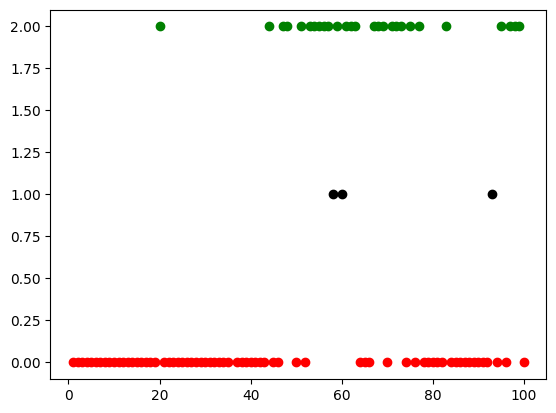

In [ ]:
#Filter rows of original data
filtered_clust0 = frame.loc [frame['Cluster'] == 0] #Probably, negative
filtered_clust1 = frame.loc [frame['Cluster'] == 1] #Probably, neutral
filtered_clust2 = frame.loc [frame['Cluster'] == 2] #Probably, positive
#Plotting the results
plt.scatter (filtered_clust0.iloc[:,0], filtered_clust0.iloc[:,2], color = 'red')
plt.scatter (filtered_clust1.iloc[:,0], filtered_clust1.iloc[:,2], color = 'black')
plt.scatter (filtered_clust2.iloc[:,0], filtered_clust2.iloc[:,2], color = 'green')
plt.show()